# EDA, Visualisation and first model
In this notebook I will:
+ Explore more columns
+ Look at the relationships between columns
+ Use external data to check my data is sufficent
+ Run baseline model and first regression model

### Contents:
- [Data Import](#Data-Import)
- [Train Data Exploratory Data Analysis](#Train-Data-Exploratory-Data-Analysis)
    - [Train Summary Statistics](#Train-Summary-Statistics)
    - [Train distributions](#Train-distributions)
    - [Train Visualisations](#Train-Visualisations)
- [Test Data Exploratory Data Analysis](#Test-Data-Exploratory-Data-Analysis)
    - [Test Summary Statistics](#Test-Summary-Statistics)
    - [Test distributions](#Test-Distributions)
- [Baseline Model](#Baseline-Model)
- [Test Model](#Test-Model)

# Data Import and Cleaning

In [424]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

#### Get Data

In [486]:
ames_train = pd.read_csv('./datasets/outputs/data_cleaning_train_1.0.csv')
ames_test = pd.read_csv('./datasets/outputs/data_cleaning_test_1.0.csv')

In [487]:
ames_train.drop(columns='Unnamed: 0', inplace=True)
ames_test.drop(columns='Unnamed: 0', inplace=True)

In [488]:
#load in case its useful for feature desctiptions
data_dict = pd.read_csv('./datasets/outputs/data_dictionary_df.csv')
data_dict.drop(columns='Unnamed: 0', inplace=True)


In [489]:
# chek no nulls in train
ames_train.isnull().sum().sort_values(ascending=False).head(5)

saleprice         0
total_bsmt_sf     0
year_remod/add    0
roof_style        0
roof_matl         0
dtype: int64

In [490]:
# chek no nulls in test
ames_test.isnull().sum().sort_values(ascending=False).head(5)

sale_type         0
yr_sold           0
year_remod/add    0
roof_style        0
roof_matl         0
dtype: int64

---

# Train Exploratory Data Analysis

## Train Summary Statistics

In [491]:
## Histograms

col_names = list(ames_train.columns)
col_names.remove('pid')
col_names.remove('id')

### Look at the statistical summary and distribution for the columns

In [492]:
ames_train.iloc[:,:35].describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,2048.830814,10024.717414,6.112140,5.562165,1971.708922,1984.190151,98.626524
std,843.980841,1.886918e+08,42.824223,6630.139513,6605.287419,1.426271,1.104497,30.177889,21.036250,174.324690
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000
50%,1486.000000,5.354532e+08,50.000000,72.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000
75%,2198.000000,9.071801e+08,70.000000,93.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,159.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


In [493]:
ames_train.iloc[:,35:50].describe()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1495.557123,0.427109,0.063384
std,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,485.546566,0.522589,0.251590
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000
50%,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000
75%,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.000000,1.000000,0.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,3820.000000,3.000000,2.000000


In [494]:
ames_train.iloc[:,50:68].describe()

,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.628474,1.775719,473.440761,93.833740
std,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.082452,0.765357,216.135102,128.549416
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000
50%,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000
max,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1424.000000


In [495]:
ames_train.iloc[:,68:].describe()

,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Observations

+ There are a lot of extreme Max values that lie outside the 75% quartile

This is to be expected and doesnt mean they are wrong. The housing data has a lot of examples where only a small proportion of the houses have particular features. 
+ for example open_porch_sf	has a mean of 47 a min of 0 and a max of 547.
+ a lot of the houses dont have a porch so sq ft is 0. Whilst others have very large porch's.
+ this creates a lot of spread out data and large standard deviartions.


---

## Train distributions

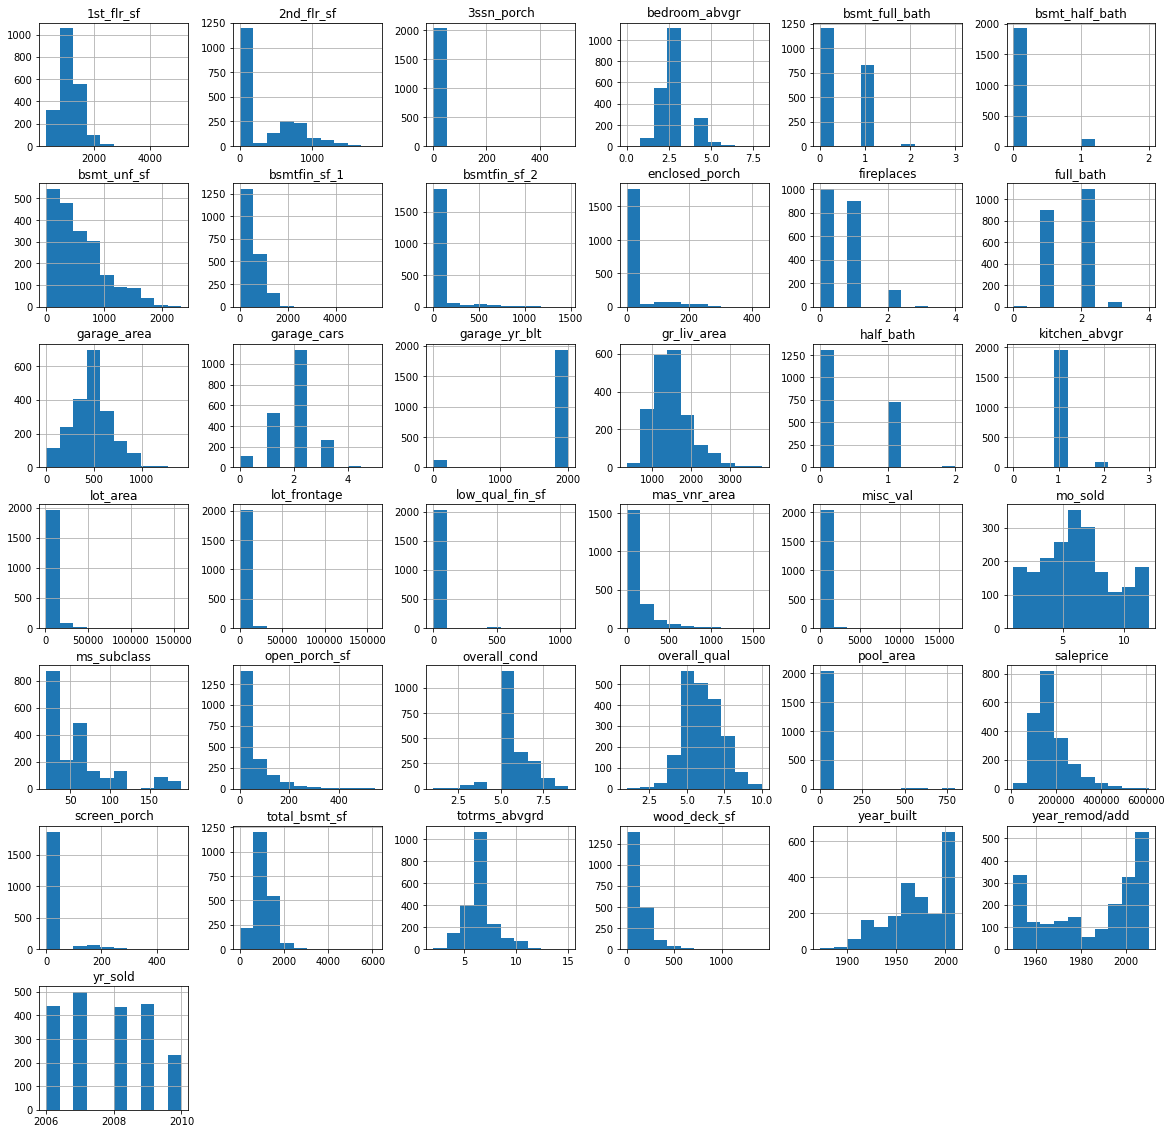

In [496]:
ames_train[col_names].hist(figsize=(20, 20));

### Observations


+ bsmt_unf_sf and bsmtfin_sf_1
    + have a positive skew on their distributions. This looks to be becuase a lot of houses dont have a basement or an unfinished one. If these were remove the distribution would look more normal.


+ garage_area and garage cars
    + look similar which makes sense but they look normally distributed. This is good but implies that most houses have a garage unlike a basement.
    
    
+ Month sold
    + Shows that the summer is a key time for sales
    
    
+ Sale price
    + This has a positive skew
    + Looks like the majority of houses are clustered around a lower price point
    


---

## Train Visualisations

## Heat map and correlations

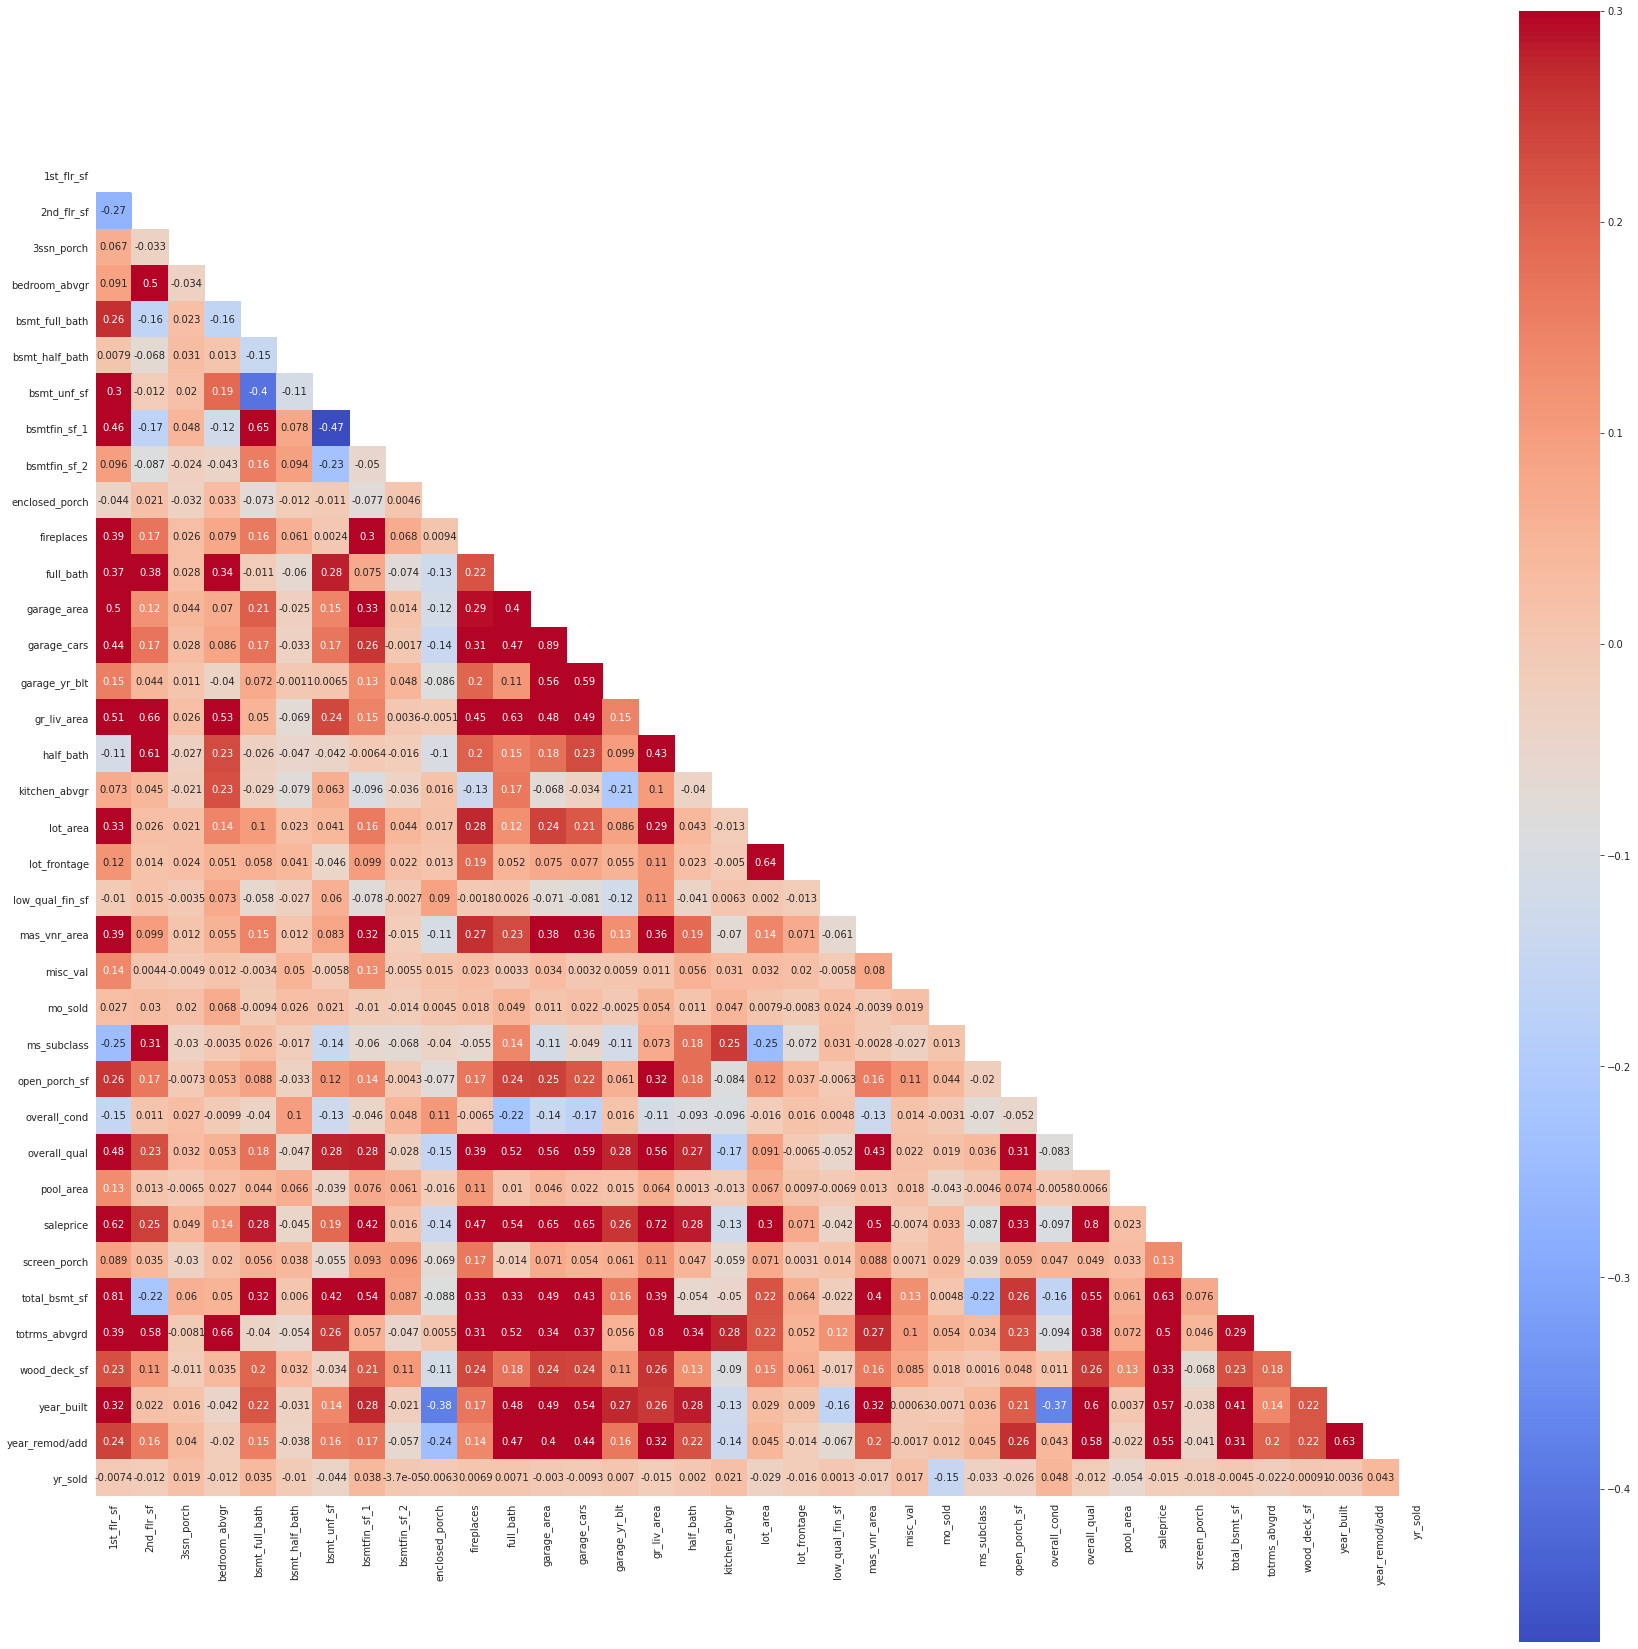

In [497]:
# plot correlations
plt.figure(figsize=(30,30))

#corr = eda_df.corr()
corr = ames_train[ames_train.columns.difference(['id', 'pid'])].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap="coolwarm")

---

## Pair plot

I will take the most correlated products and create a pairplot

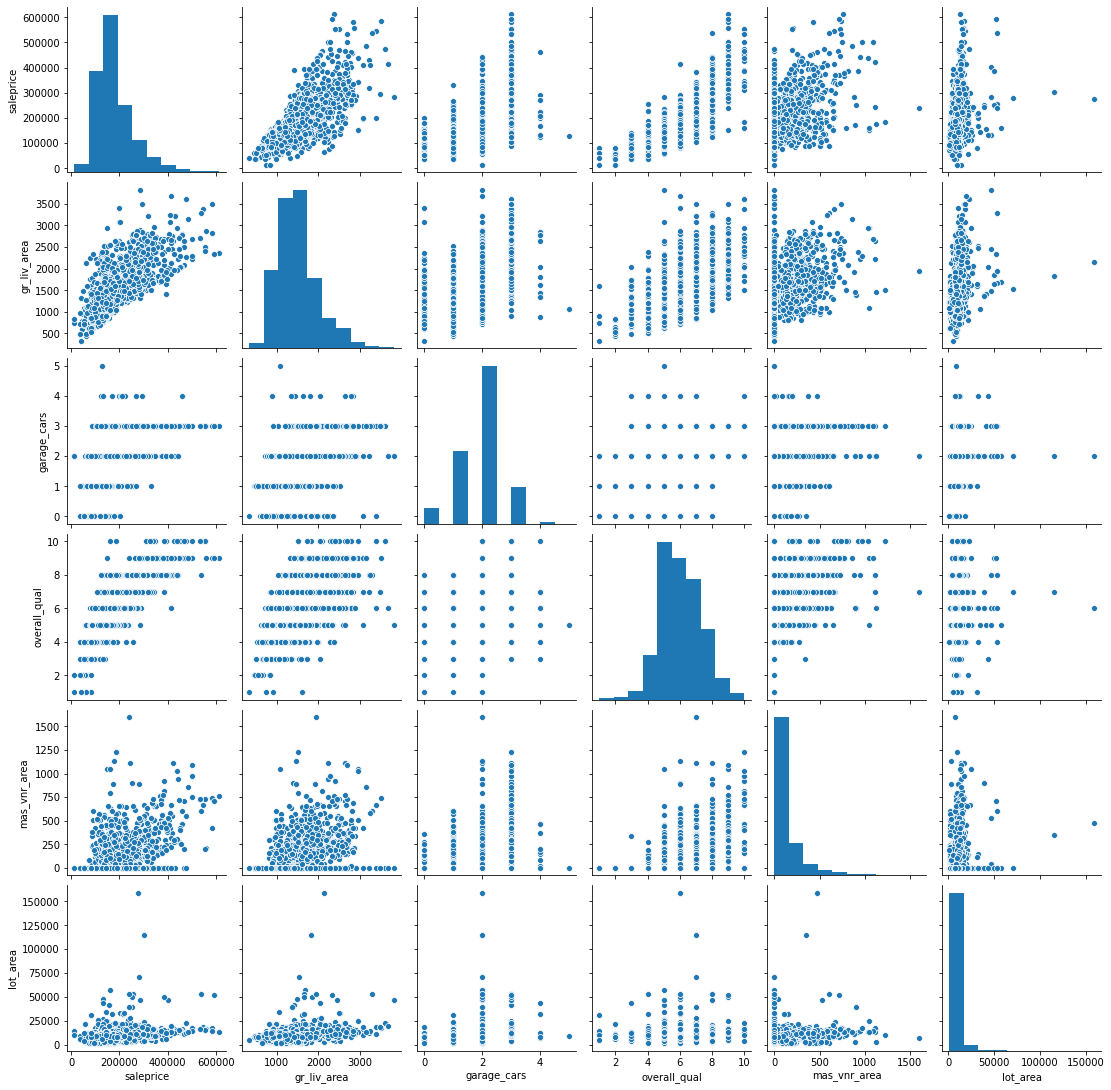

In [498]:
sns.pairplot(ames_train[['saleprice','gr_liv_area','garage_cars','overall_qual','mas_vnr_area','lot_area']]);

## Barplots

I'll look at a few features highlighted and investigate further

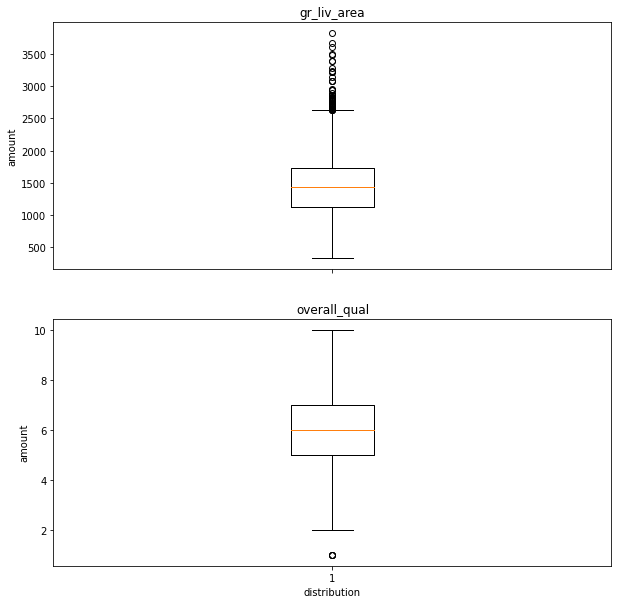

In [499]:
# Genaral area sq ft

fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].boxplot(ames_train['gr_liv_area'])
axs[0].set_title('gr_liv_area')
axs[1].boxplot(ames_train['overall_qual'])
axs[1].set_title('overall_qual')

for ax in axs.flat:
    ax.set(xlabel='distribution', ylabel='amount')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

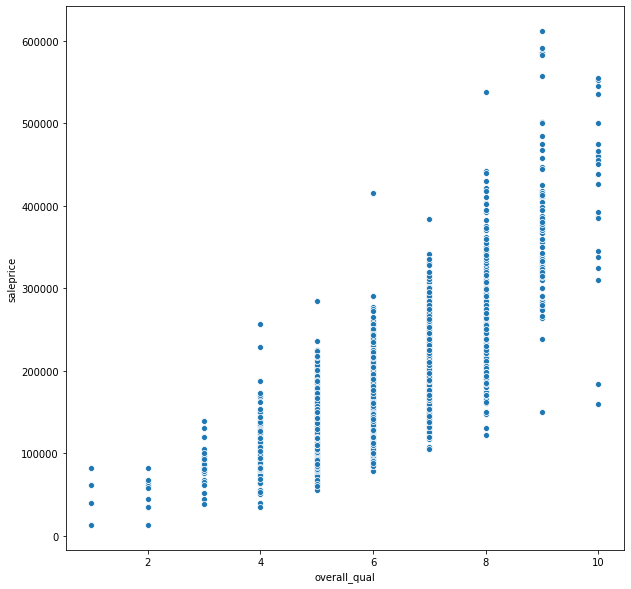

In [500]:
plt.figure(figsize=(10,10))

sns.scatterplot(ames_train['overall_qual'], ames_train['saleprice']);

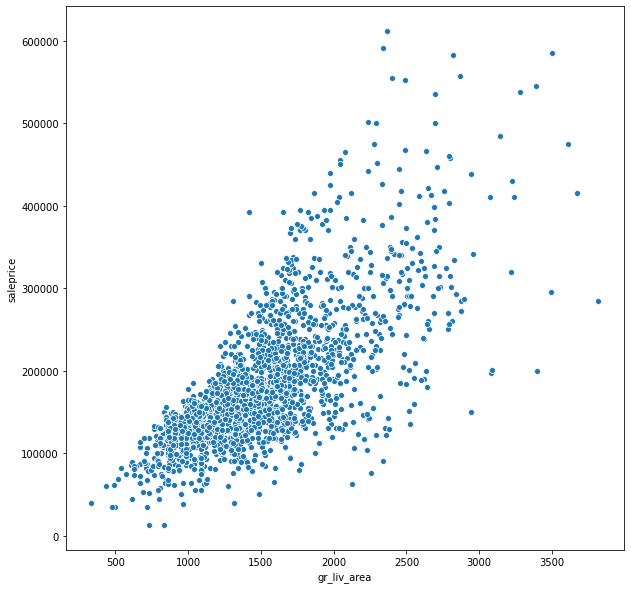

In [501]:
plt.figure(figsize=(10,10))

sns.scatterplot(ames_train['gr_liv_area'], ames_train['saleprice']);

### Observations


+ Both very well correlated to price


+ gr_liv_area
    + has strong correlation
    + Generally has a lot more outliers as there are quite a lot of large houses which can be seen in the distributions too.
    + there are two outliers with large areas but its not reflected in the price
    
    
+ overall_quality 
    + is ordinal and despite the banding it is clear there is a correlation with price
    + the distribution in the box plot doesnt show outliers as its restricted to values 1-10




##### I'll investigate the 2 outliers

In [502]:
ames_train[['ms_subclass','gr_liv_area','street','alley','overall_qual','lot_area','1st_flr_sf','2nd_flr_sf',
            'total_bsmt_sf','neighborhood','bldg_type','yr_sold','saleprice']][ames_train['gr_liv_area'] > 4000]

,ms_subclass,gr_liv_area,street,alley,overall_qual,lot_area,1st_flr_sf,2nd_flr_sf,total_bsmt_sf,neighborhood,bldg_type,yr_sold,saleprice


After looking at the properties you can see they are 2 single family detached homes. Looking at a [map of clear creek](https://www.google.com/maps/place/Clear+Creek/@42.0355885,-93.6493107,16.77z/data=!4m5!3m4!1s0x87ee70b96e847b87:0xc6f98c504e17c08a!8m2!3d42.0360967!4d-93.6488301) its situated between a highway, a river, a golf course. Its possible that a 3 acre plot exists. The price doesn't suggest that this is a mansion or anything of extreme value. The lot size is not as correlated to price as other features such a living area. I am going to assume they are not errors.

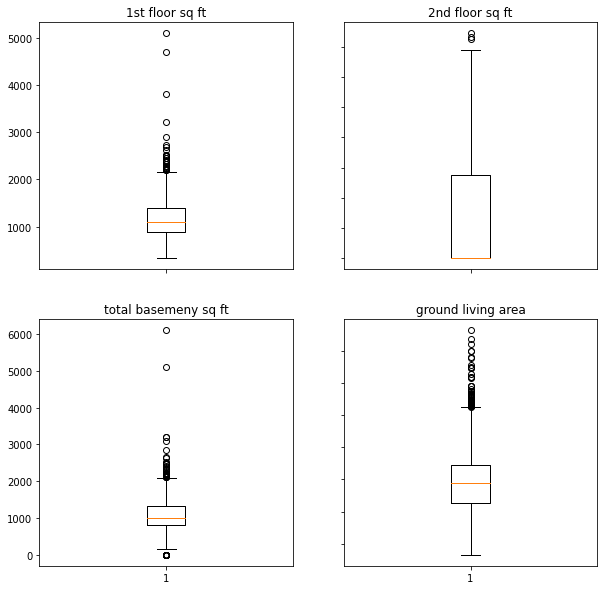

In [503]:
# Genaral area sq ft
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].boxplot(ames_train['1st_flr_sf'])
axs[0, 0].set_title('1st floor sq ft')
axs[0, 1].boxplot(ames_train['2nd_flr_sf'])
axs[0, 1].set_title('2nd floor sq ft')
axs[1, 0].boxplot(ames_train['total_bsmt_sf'])
axs[1, 0].set_title('total basemeny sq ft')
axs[1, 1].boxplot(ames_train['gr_liv_area'])
axs[1, 1].set_title('ground living area')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

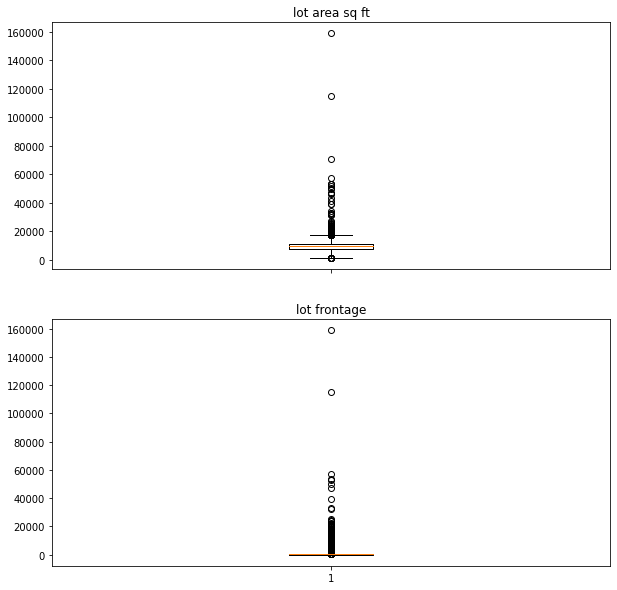

In [504]:
# Genaral area sq ft
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].boxplot(ames_train['lot_area'])
axs[0].set_title('lot area sq ft')
axs[1].boxplot(ames_train['lot_frontage'])
axs[1].set_title('lot frontage')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Observations
There are outliers but this is in line with expectation that some houses are a lot larger than the majority. However I will look at the 2 very large houses in terma of basement and ground living area.

In [505]:
ames_train[['ms_subclass','gr_liv_area','street','alley','overall_qual','lot_area','1st_flr_sf','2nd_flr_sf',
            'total_bsmt_sf','neighborhood','bldg_type','lot_frontage','saleprice']][ames_train['lot_area'] > 100000]

,ms_subclass,gr_liv_area,street,alley,overall_qual,lot_area,1st_flr_sf,2nd_flr_sf,total_bsmt_sf,neighborhood,bldg_type,lot_frontage,saleprice
471,50,2144.0,Pave,None,6,159000.0,1444,700,1444.0,ClearCr,1Fam,159000.0,277000
694,20,1824.0,Pave,None,7,115149.0,1824,0,1643.0,ClearCr,1Fam,115149.0,302000


After looking at the properties you can see they are 2 single family detached homes. Looking at a [map of clear creek](https://www.google.com/maps/place/Clear+Creek/@42.0355885,-93.6493107,16.77z/data=!4m5!3m4!1s0x87ee70b96e847b87:0xc6f98c504e17c08a!8m2!3d42.0360967!4d-93.6488301) its situated between a highway, a river, a golf course. Its possible that a 3 acre plot exists. The price doesn't suggest that this is a mansion or anything of extreme value. The lot size is not as correlated to price as other features such a living area. I am going to assume they are not errors.

### Decision


Cross checking with the kaggle data shows there are no errors. Also the sum of 1st floor and 2nd floor add up to gr_liv _area this suggests there hasnt been a typo. 


However these values causes a problem later with the predictions so I will give it the mean. And the outliers for sqft I will remove as well.


In [506]:
ames_train.loc[960,'lot_area'], ames_train.loc[1885,'lot_area']

(10065.20819112628, 10065.20819112628)

In [507]:
ames_train.loc[960,'lot_area'] = 10065.20819112628

In [508]:
ames_train.loc[1885,'lot_area'] = 10065.20819112628

In [509]:
#ames_train.loc[960,'lot_area'], ames_train.loc[1885,'lot_area']

In [510]:
#ames_train.loc[ames_train['gr_liv_area'] > 4000,'gr_liv_area'] = ames_train['gr_liv_area'].mean()

In [511]:
# check its updated
ames_train.loc[[960,1885],'gr_liv_area']

960     1499.330083
1885    1499.330083
Name: gr_liv_area, dtype: float64

----

### Outside research

There are some key elements that affect the house prices:
[source](https://www.opendoor.com/w/blog/factors-that-influence-home-value)

1. Neighborhood comps
2. Location
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. The local market
7. Economic indicators
8. Interest rates


The data already has some of these features but Ill investigate more.

Is the year of sale reflected proportionally to the market so the the local market, econimic indicators and interest rate would be represented?


### yr sold distribution

The City of Ames [lists](https://www.cityofames.org/home/showdocument?id=32391) the actual sales numbers:

In [512]:
# Real data

actual_sales = pd.DataFrame()
actual_sales['year_sold'] = [2006,2007,2008,2009,2010]
actual_sales['sold'] = [758, 786, 626, 613, 532]

In [513]:
# Get our data values

av_hp_by_yr = pd.DataFrame(ames_train.groupby('yr_sold')['saleprice'].mean())
av_hp_by_yr.reset_index(inplace=True)
av_hp_by_yr

,yr_sold,saleprice
0,2006,179471.609589
1,2007,185524.514056
2,2008,181750.372414
3,2009,182455.244395
4,2010,174180.059829


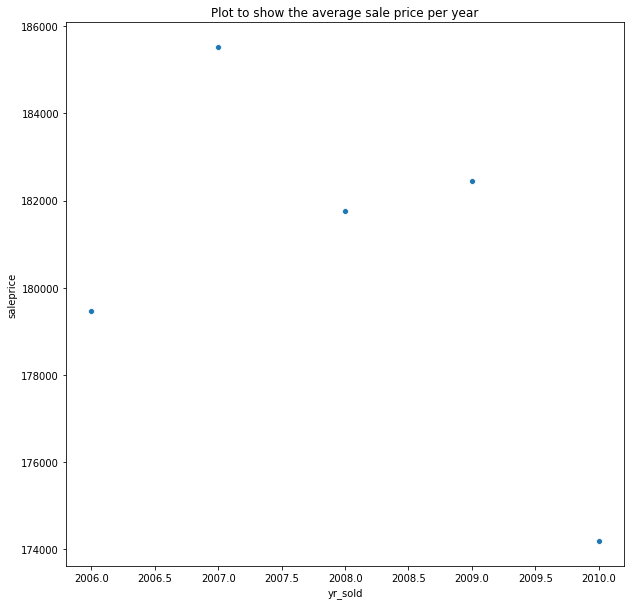

In [514]:
# Plot the graph

plt.figure(figsize=(10,10))
sns.scatterplot(av_hp_by_yr['yr_sold'], av_hp_by_yr['saleprice']);
plt.title('Plot to show the average sale price per year');

In [515]:
# Count of house sales
av_sales_by_yr = pd.DataFrame(ames_train.groupby('yr_sold')['saleprice'].size())
av_sales_by_yr.reset_index(inplace=True)
av_sales_by_yr

,yr_sold,saleprice
0,2006,438
1,2007,498
2,2008,435
3,2009,446
4,2010,234


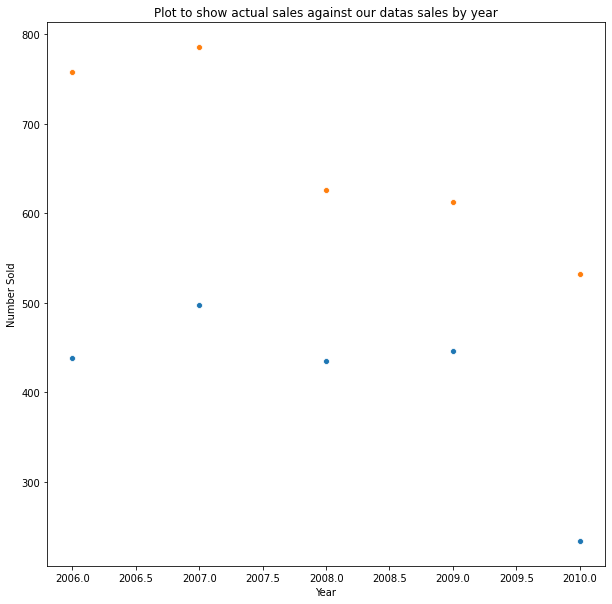

In [516]:
plt.figure(figsize=(10,10))
sns.scatterplot(av_sales_by_yr['yr_sold'], av_sales_by_yr['saleprice']);
sns.scatterplot(actual_sales['year_sold'], actual_sales['sold']);
plt.xlabel('Year')
plt.ylabel('Number Sold')
plt.title('Plot to show actual sales against our datas sales by year');

### Summary of charts

The Ames housing data set is already proportionally reflecting the actual sales numbers in Ames. Therefore there is no need to make any adjustment for it.

The average sales price also fluctuates by year in a similar fashion. This is good to know that the year is a good way to reflect several of the key factors identified by outside research.



---

# Test Data Exploratory Data Analysis

## Test Summary Statistics

In [517]:
ames_test.iloc[:,:35].describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area
count,879.000000,8.790000e+02,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,70.800470,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.861206
std,850.717105,1.889135e+08,42.211389,26.619556,10047.335167,1.374756,1.128422,30.403527,20.454546,188.284115
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000
25%,692.500000,5.284861e+08,20.000000,60.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000
50%,1435.000000,5.354542e+08,50.000000,69.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.000000
max,2928.000000,1.007100e+09,190.000000,483.510180,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000


In [518]:
ames_test.iloc[:,35:50].describe()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745
std,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560
min,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000
25%,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000
50%,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000
75%,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000
max,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000


In [519]:
ames_test.iloc[:,50:68].describe()

,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1875.594994,1.744027,470.832765,93.560865
std,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,436.640608,0.751162,213.070155,121.174306
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,323.000000,0.000000
50%,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,473.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,171.000000
max,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000


In [520]:
ames_test.iloc[:,68:].describe()

,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


## Test Distributions

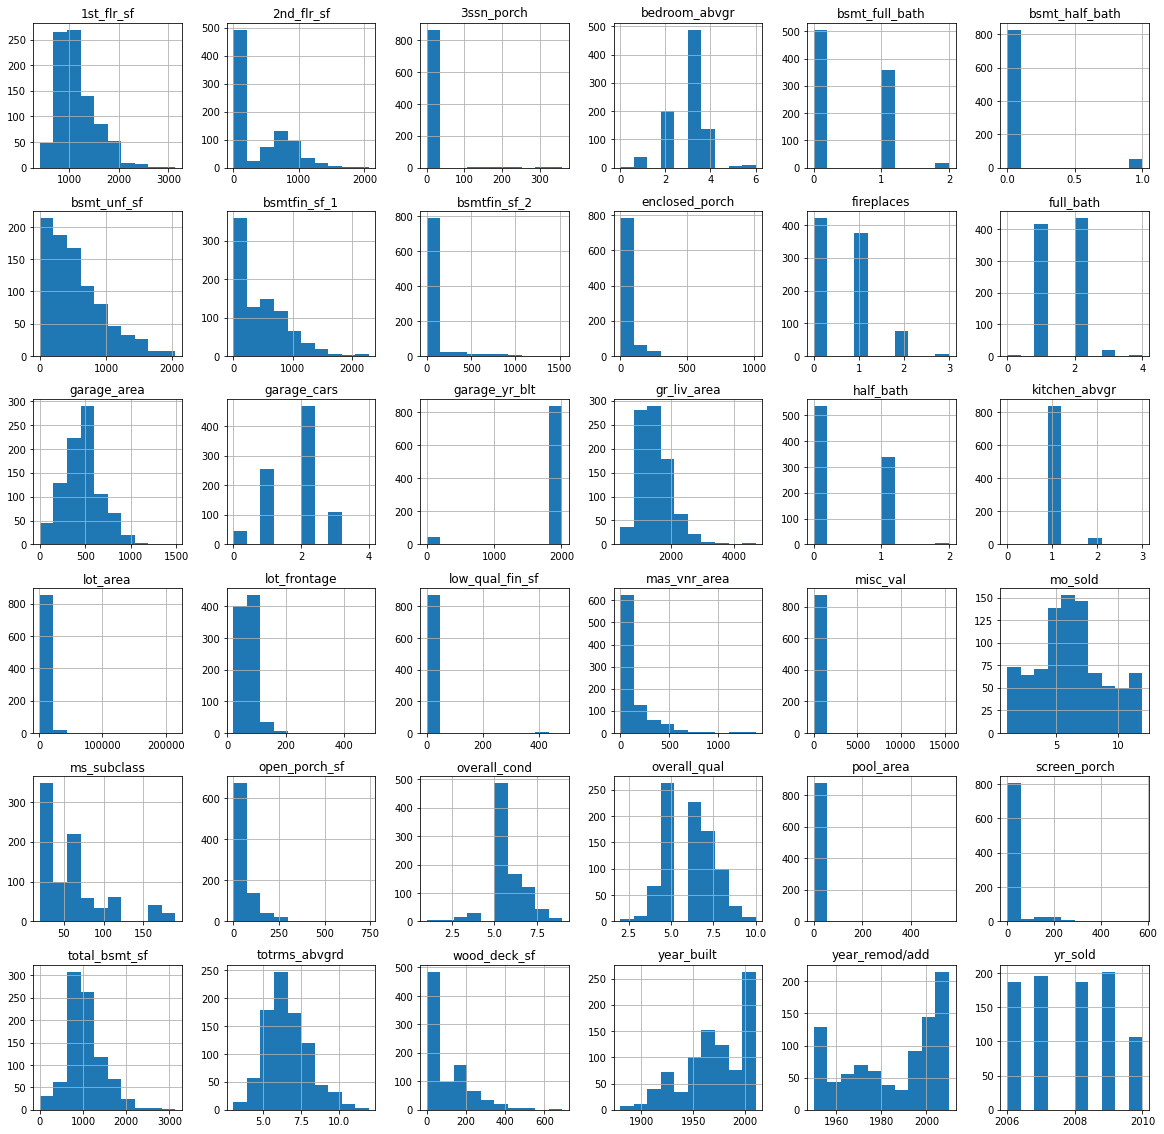

In [521]:
col_names_test_data = col_names
col_names_test_data.remove('saleprice')
ames_test[col_names_test_data].hist(figsize=(20, 20));

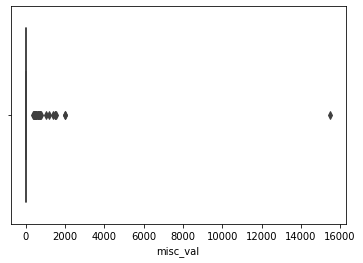

In [522]:
sns.boxplot(ames_test['misc_val']);

In [523]:
ames_test[['pid','misc_val','misc_feature','garage_cars',
           'garage_area']][ames_test['misc_feature'] == 'Gar2'].sort_values('misc_val', ascending=False).head(10)

,pid,misc_val,misc_feature,garage_cars,garage_area
778,534275170,15500,Gar2,1,301


In [524]:
ames_test.groupby('misc_feature')['misc_val'].sum()

misc_feature
Gar2    15500
None        0
Othr        0
Shed    27082
Name: misc_val, dtype: int64

I will leave this in because it relates to a one off feature and it makes sense that it would add about $15,000 for a second garage.

---

### Observations

The observations are in line with the ames_train data

## Heat map and correlations

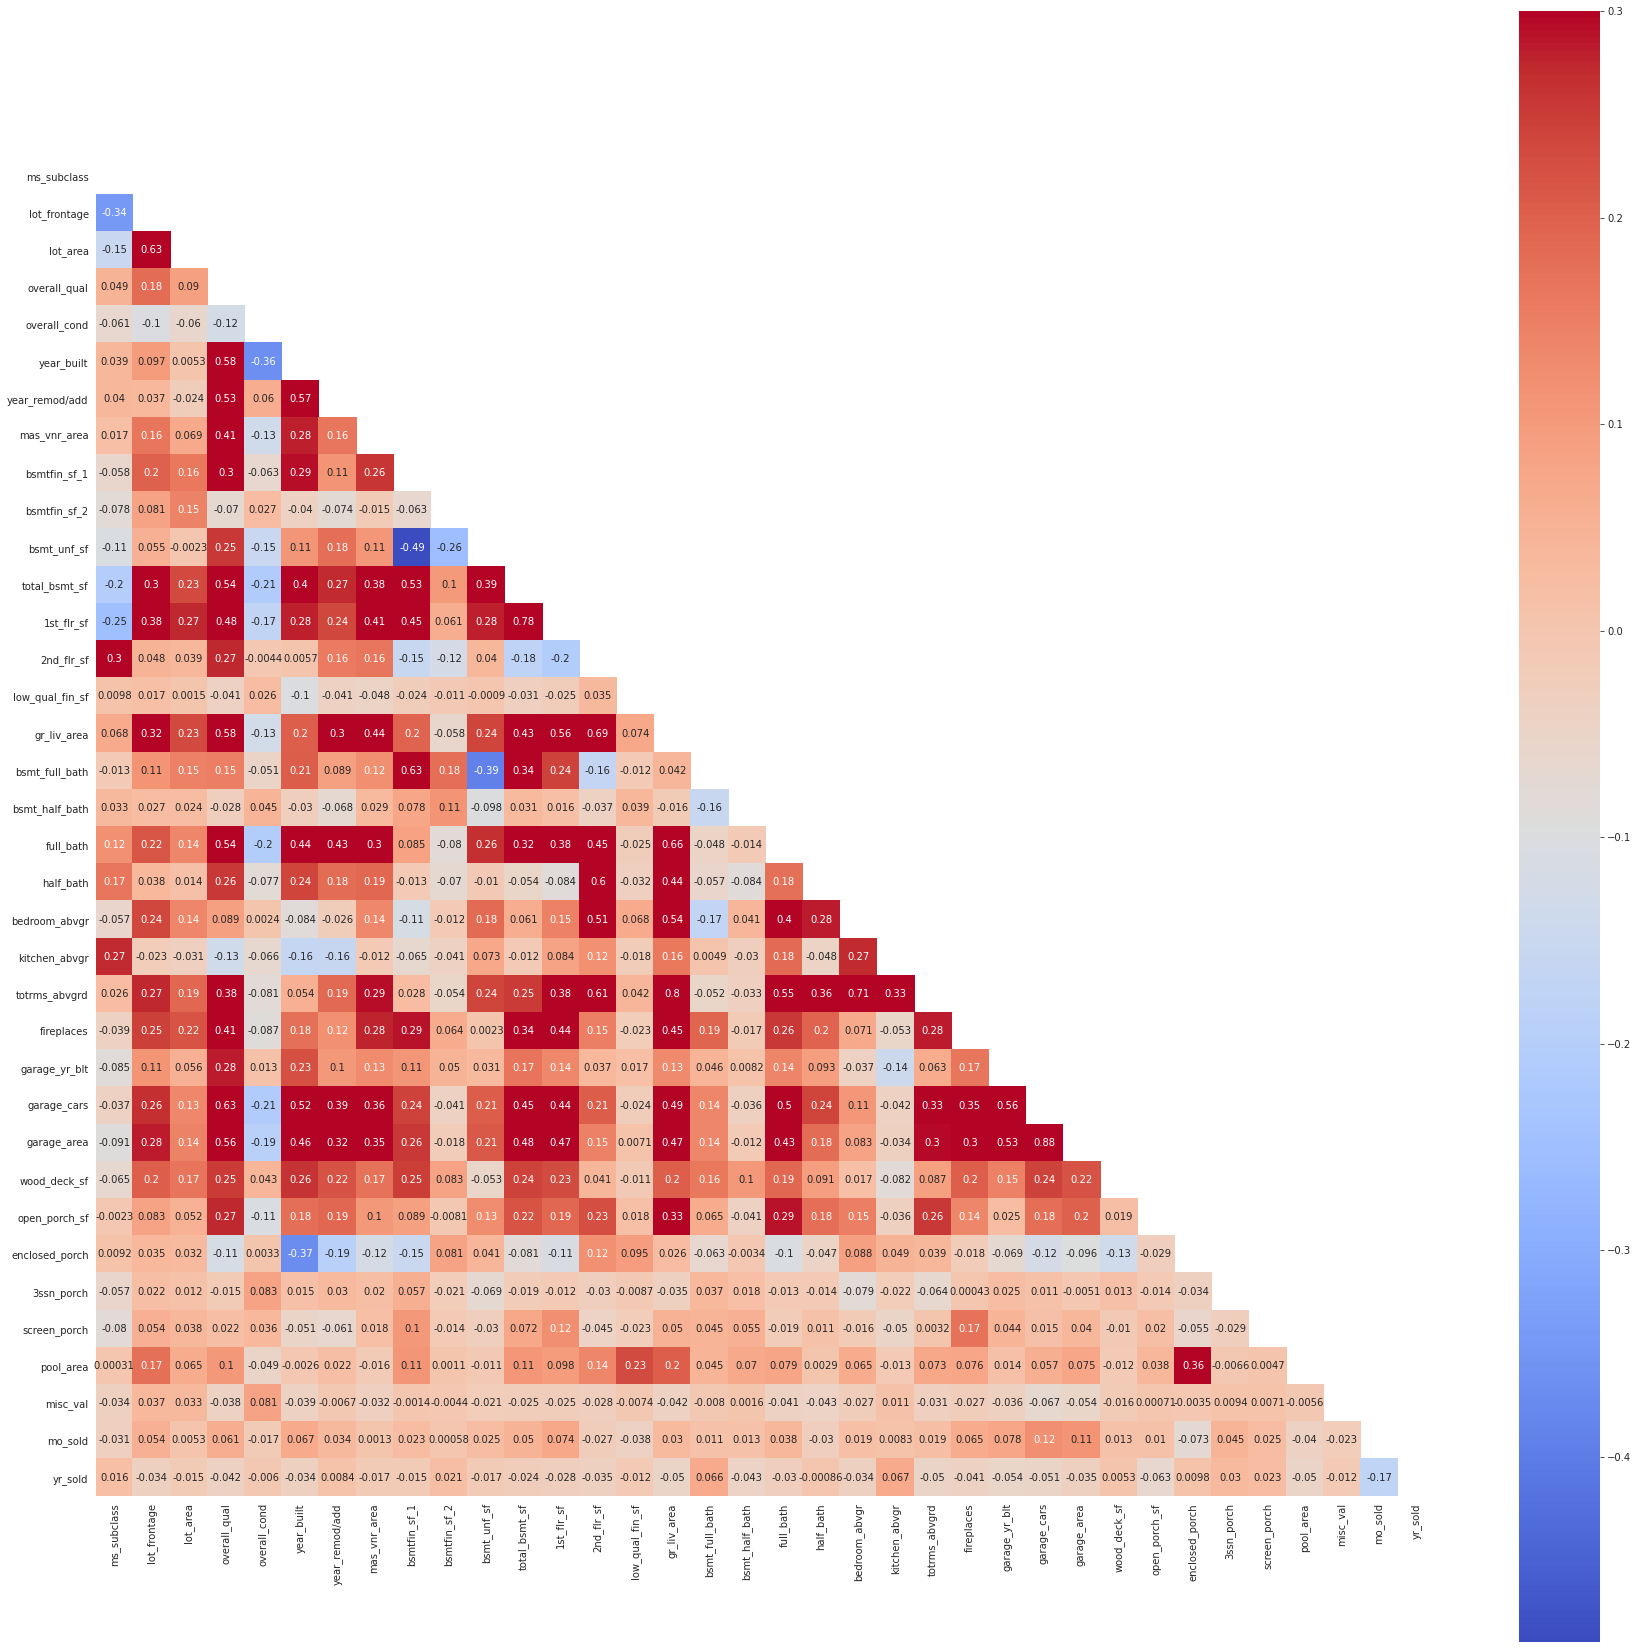

In [525]:
# plot correlations
plt.figure(figsize=(30,30))

#corr = eda_df.corr()
corr = ames_test[col_names_test_data].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap="coolwarm")

#### Observations

The heatmap is similar to ames_train data. However without the sales price it is hard to gain further correlations

---

# Baseline and 1st model

I have found some interesting featuures and will try a first run at the model. I need to do a baseline first to compare it and will hopefully show progression when I do feature engineering next.

---

# Baseline Model



I will use the mean for the baseline. What this means is that this model predicts every new hous to be the mean. 

In [526]:
# Get the mean sales price
ames_train['saleprice'].mean()

181469.70160897123

In [527]:
avg_salesprice = [ames_train['saleprice'].mean()]*2051

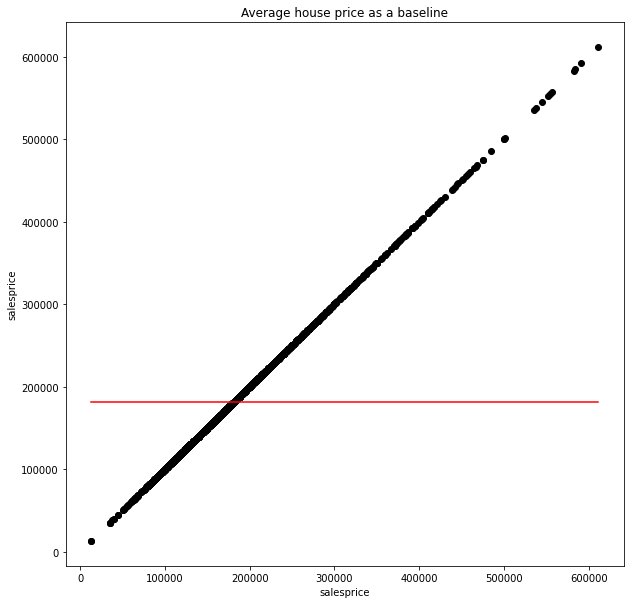

In [528]:
# plot the data for mean
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

# plot the data
ax.scatter(ames_train['saleprice'],ames_train['saleprice'], c='k')
ax.plot((ames_train['saleprice'].min(), 
         ames_train['saleprice'].max()),
        (np.mean(ames_train['saleprice']), 
         np.mean(ames_train['saleprice'])), color='r');
plt.ylabel('salesprice')
plt.xlabel('salesprice')
plt.title('Average house price as a baseline');

In [529]:
# Calculate RMSE for baseline
(np.mean(np.square(ames_train['saleprice']-avg_salesprice))) ** 0.5

79239.33504161824

### Conclusion

This is the baseline which I can try and beat with my other models. This result means that if i just used the average to predict my RMSE score would be just under $79,239

---

# Test Model

I will trial a model using the features I have so far identified as correated to 'salesprice'. I can also compare it to my baseline.

Further explanation on the models I am using and the socres is given in the Modelling work book

In [558]:
X_related_feats = ['1st_flr_sf','bsmtfin_sf_1','fireplaces','full_bath','garage_area','gr_liv_area','overall_qual']
X = ames_train[X_related_feats]
y = ames_train['saleprice']

In [559]:
# split the test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [560]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [561]:
# instantiate the models
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1,10,100))
enet = ElasticNetCV(l1_ratio=np.linspace(0.0001,1,100), n_alphas=100)


#### cross validation

In [562]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()


0.7924328076846108

In [563]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.7929834125864372

In [564]:
ridge_scores = cross_val_score(ridge, X_train,y_train, cv=5)
ridge_scores.mean()

0.7925441453589963

In [565]:
enet_scores = cross_val_score(enet, X_train, y_train, cv=5)
enet_scores.mean()

0.7929822710572066

In [566]:
lasso_scores.mean() >  enet_scores.mean() > ridge_scores.mean() > lr_scores.mean() 

True

Lasso is the best so I will use this for the predictions.

In [567]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [568]:
lasso.score(X_train, y_train)

0.8005879725831115

In [569]:
lasso.score(X_test, y_test)

0.8437706259767693

In [570]:
y_pred = lasso.predict(X_test)

In [571]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

31146.938726426066

--- 

## Summary

This is a good start as RMSE of ~31,000 beats baseline by ~47,000. But hopefully still room for improvement.

It has revealed some key features that exist in the data such as:
+ 'full_bath'
+ 'garage_area'
+ 'gr_liv_area'
+ 'overall_qual'

## Could I answer the problem statement?

This workbook which has continued the EDA and visualisation has provided some valuable insights and can partially answer the problem statement.

However the following still needs to occur:
+ Converting categorical columns into dummy data so it can be put into the model
+ Convert ordinal data into numeric data whilst still capturing the scale data

This will be looked at in the next workbook


---

In [572]:
# Save Data
ames_train.to_csv('./datasets/outputs/data_cleaning_train_1.0.csv')